# Impact of Meltdown patch on performance (ARCHER)

This notebook contains the results of the ARCHER benchmarks run before and after patching for the Meltdown security issues on the ARCHER system at EPCC.

The unpatched results are from the main ARCHER system and these initial patched results are from the TDS (Test and Development System). This may lead to differences due to the TDS being much quieter than the main system.

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [3]:
import sys
sys.path.append('../python-modules')

## Application Benchmarks

### CASTEP Al Slab (al3x3)

In [4]:
from appanalysis import castep

In [5]:
castep_unpatched = {
                    2:'../apps/CASTEP/al3x3/results/ARCHER/al3x3.castep.2nodes',
                    4:'../apps/CASTEP/al3x3/results/ARCHER/al3x3.castep.4nodes',
                    8:'../apps/CASTEP/al3x3/results/ARCHER/al3x3.castep.8nodes',
                    }

In [6]:
cpn = 24
cores_unpatched, scf_unpatched, su_unpatched = castep.calcperf(castep_unpatched, cpn)

          Nodes           Cores    Mean SCF (s)         Speedup
          =====           =====    ============         =======
              2              48            88.2            1.00
              4              96            51.3            1.72
              8             192            33.2            2.66


In [7]:
castep_patched = {2:'../apps/CASTEP/al3x3/results/ARCHER_TDS_meltdown/al3x3_2nodes_201803011027.castep',
                    4:'../apps/CASTEP/al3x3/results/ARCHER_TDS_meltdown/al3x3_4nodes_201803011015.castep',
                    8:'../apps/CASTEP/al3x3/results/ARCHER_TDS_meltdown/al3x3_8nodes_201803011006.castep'
                }

In [8]:
cores_patched, scf_patched, su_patched = castep.calcperf(castep_patched, cpn)

          Nodes           Cores    Mean SCF (s)         Speedup
          =====           =====    ============         =======
              2              48            89.4            1.00
              4              96            51.5            1.74
              8             192            32.8            2.73


In [9]:
castep_patched_compile = {2:'../apps/CASTEP/al3x3/results/ARCHER_TDS_meltdown_recompile/al3x3_2nodes_201803071059.castep',
                    4:'../apps/CASTEP/al3x3/results/ARCHER_TDS_meltdown_recompile/al3x3_4nodes_201803071047.castep',
                    8:'../apps/CASTEP/al3x3/results/ARCHER_TDS_meltdown_recompile/al3x3_8nodes_201803071038.castep'
                }

In [10]:
cores_patched_r, scf_patched_r, su_patched_r = castep.calcperf(castep_patched_compile, cpn)

          Nodes           Cores    Mean SCF (s)         Speedup
          =====           =====    ============         =======
              2              48            89.0            1.00
              4              96            51.2            1.74
              8             192            32.9            2.71


In [26]:
print("{:>15s}{:>15s}{:>15s}{:>25s}".format('Cores','Unpatched','Patched','Patched (recompile)'))
print("{:>15s}{:>15s}{:>15s}{:>25s}".format('=====','=========','=======','==================='))
for i, cores in enumerate(cores_unpatched):
    perf_u = 1.0/scf_unpatched[i]
    perf_p = 1.0/scf_patched[i]
    perf_r = 1.0/scf_patched_r[i]
    print('{:15d}{:15.3f}{:15.3f}{:25.3f}'.format(cores, perf_u, perf_p, perf_r))

          Cores      Unpatched        Patched      Patched (recompile)
          =====      =========        =======      ===================
             48          0.011          0.011                    0.011
             96          0.019          0.019                    0.020
            192          0.030          0.031                    0.030


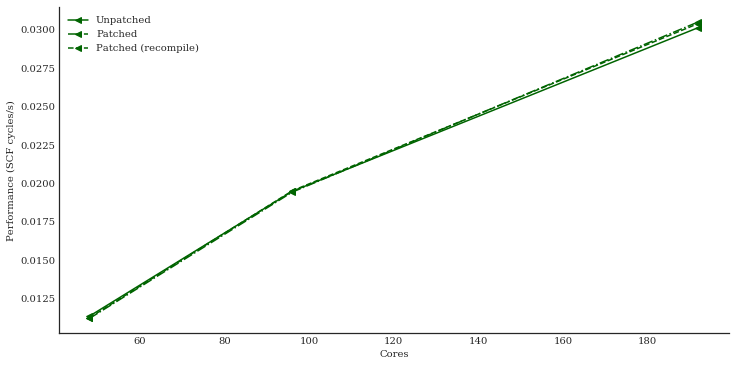

In [12]:
plt.plot(cores_unpatched, [1/x for x in scf_unpatched], '<-', color='darkgreen', label='Unpatched')
plt.plot(cores_patched, [1/x for x in scf_patched], '<-.', color='darkgreen', label='Patched')
plt.plot(cores_patched_r, [1/x for x in scf_patched_r], '<--', color='darkgreen', label='Patched (recompile)')
plt.xlabel('Cores')
plt.ylabel('Performance (SCF cycles/s)')
plt.legend(loc='best')
sns.despine()

### GROMACS

In [13]:
from appanalysis import gromacs

In [16]:
gmx_u = {
         8:'../apps/GROMACS/large/results/ARCHER/nc2-cubic-md_8nodes_201711211932.log',
         16:'../apps/GROMACS/large/results/ARCHER/nc2-cubic-md_16nodes_201711160216.log',
         32:'../apps/GROMACS/large/results/ARCHER/nc2-cubic-md_32nodes_201711140119.log'
        }

In [17]:
gmx_cores_u, gmx_perf_u, gmx_su_u = gromacs.calcperf(gmx_u, cpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              8             192           0.140            1.00
             16             384           0.243            1.74
             32             768           0.406            2.90


In [18]:
gmx_p = {
         8:'../apps/GROMACS/large/results/ARCHER/nc2-cubic-md_8nodes_201711211932.log',
         16:'../apps/GROMACS/large/results/ARCHER_TDS_meltdown/nc2-cubic-md_16nodes_201803081358.log',
         32:'../apps/GROMACS/large/results/ARCHER_TDS_meltdown/nc2-cubic-md_32nodes_201803081350.log'
        }

In [19]:
gmx_cores_p, gmx_perf_p, gmx_su_p = gromacs.calcperf(gmx_p, cpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              8             192           0.140            1.00
             16             384           0.260            1.86
             32             768           0.473            3.38


In [20]:
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('Cores','Unpatched','Patched','Comparison'))
print("{:>15s}{:>15s}{:>15s}{:>15s}".format('=====','=======','=========','=========='))
for i, cores in enumerate(gmx_cores_u):
    print('{:15d}{:15.3f}{:15.3f}{:15.3f}'.format(cores, gmx_perf_u[i], gmx_perf_p[i],gmx_perf_p[i]/gmx_perf_u[i]))

          Cores      Unpatched        Patched     Comparison
          =====        =======      =========     ==========
            192          0.140          0.140          1.000
            384          0.243          0.260          1.070
            768          0.406          0.473          1.165


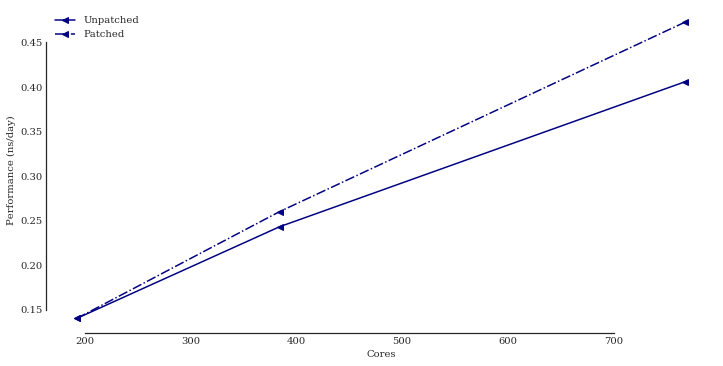

In [22]:
plt.plot(gmx_cores_u, gmx_perf_u, '<-', color='navy', label='Unpatched')
plt.plot(gmx_cores_p, gmx_perf_p, '<-.', color='navy', label='Patched')
plt.xlabel('Cores')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine(trim=True)